# Feature Engineering

_“Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.”_

Feature engineering is about creating new input features from your existing ones.

- Feature Enginnering = **ADD features**
- Data Cleaning = **REMOVE features**

This is often one of the most valuable tasks a data scientist can do to improve model performance

Você pode isolar e destacar informações importantes, o que ajuda seus algoritmos a "se concentrar" no que é importante.
Você pode trazer seu próprio conhecimento de domínio. Crie novas features a partir do que vc já sabe, por exemplo, em stock price do facebook, tal dia aconteceu o escandalo do cambriege analystics

É a parte onde mais se testa hipóteses !


- Structured Data
  - Numerical (continuos and discret)
  - Categorical
  - Temporal Series
- Unstrucutred Data
  - Images
  - Text
- Feature Selection
  - Filtering
    - Correlations
  - Reduce Dimensionality
  - Feature Importance
    - Enbabled in models - são modelos que já fazem um Feature seletion, ex: random forest. Neste caso só é utilizado o modelo para ele fazer o feature selection. Não é preciso usa-lo 
    - https://medium.com/data-hackers/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-faf74e357913

reference
- muitas técnicas: https://www.infoq.com/br/presentations/extraindo-o-potencial-maximo-dos-dados-para-modelos-preditivos/ 
- https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch04_Feature_Engineering_and_Selection


## List of Techniques

Numerical Features

1. Log Transform

log_function.png
log_example.png

1. Binarization
    1. One-Hot Encoding (3-preprocessing)


1. Feature scaling
 - MinMax Scaling
 - Standard Scaling (Z-score)
 
1. Normalization

1. Binning (continuos ---> discretize)
  - data wawrehouse
  - Cada bin representa um range de dados
  - The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance
   - Every time you bin something, you sacrifice information and make your data more regularized. 
  - The trade-off between performance and overfitting is the key point of the binning process.


1. Grouping Operations
  - Categorical Column Grouping
    - highest frequency. `groupby()`
    - pivot table `pivot_table()` pivot_table.png aggregated functions for the values between grouped and encoded columns. This would be a good option if you aim to go beyond binary flag columns and merge multiple features into aggregated features
  - Numerical Column Grouping: Numerical columns are grouped using sum and mean functions in most of the cases.


1. Feature Hashing
For large scale categorical features
- Hashing schemes work on strings, numbers and other structures like vectors. 
- `FeatureHasher()`




This is often one of the most valuable tasks a data scientist can do to improve model performance

Você pode isolar e destacar informações importantes, o que ajuda seus algoritmos a "se concentrar" no que é importante.
Você pode trazer seu próprio conhecimento de domínio. Crie novas features a partir do que vc já sabe, por exemplo, em stock price do facebook, tal dia aconteceu o escandalo do cambriege analystics

- one-hot encoding
- Bag of words
- Dummy variables
- Feature Selection
- Feature Importance
- Interaction Features (products, sums, or differences between two features.)

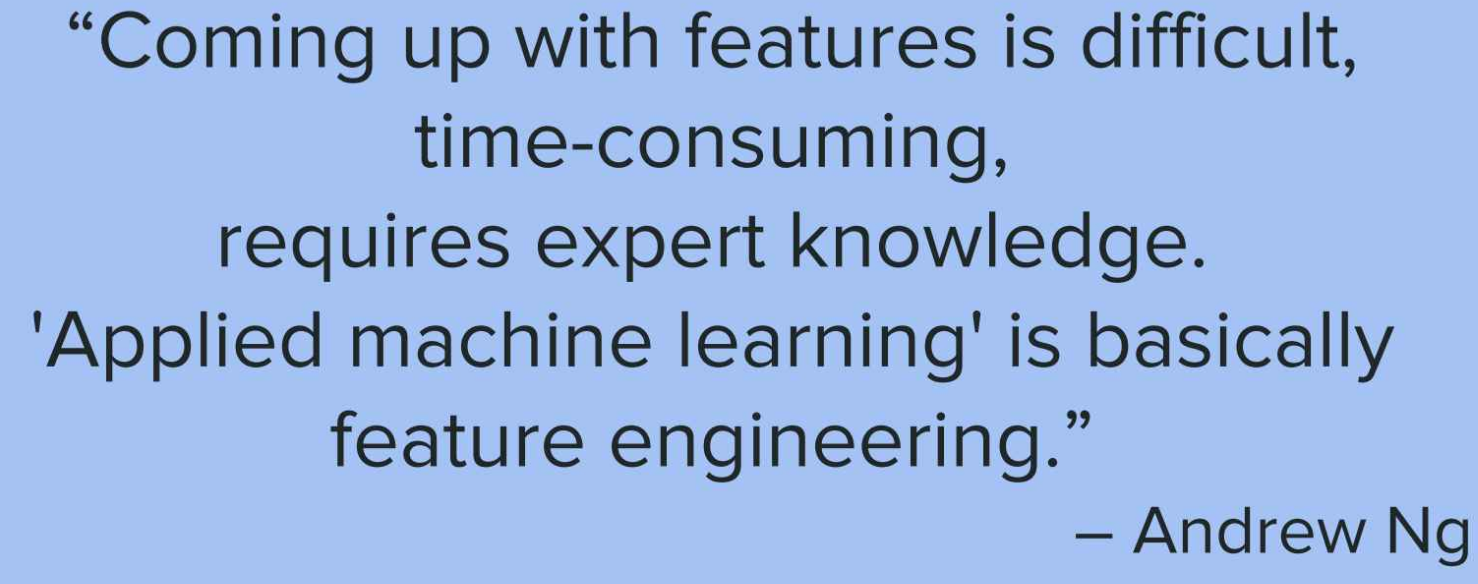

In [197]:
# hide_code
Image('references/images/feature_eng.png', width=800, height=100)

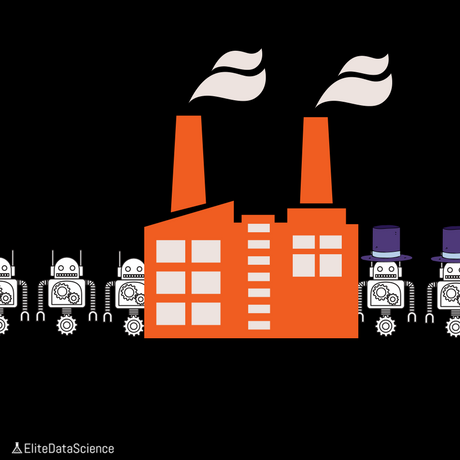

In [6]:
# hide_code
from IPython.display import Image 
Image('reports/stay_elegant.png')

- Traninig multiples models: https://olgabelitskaya.github.io/sklearn_cookbook.html

- comparin models: https://leportella.com/cheatlist/2018/05/20/models-cheat-list.html

- comparain: https://semanti.ca/blog/?the-most-important-machine-learning-algorithms

- decision tree: https://github.com/mainkoon81/Study-09-MachineLearning-B

### Imports

In [139]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

### Prepare Principal Directory

In [101]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [102]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/data-science/flow_analysis'

### Cell Format

In [123]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Graph style
sns.set(style='',font=font_family, palette='deep')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [161]:
%%time

df_census = pd.read_csv('data/raw/census.csv', 
                       encoding='utf8',
                       sep=',',
                       verbose=True)

Tokenization took: 46.11 ms
Type conversion took: 33.23 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 92.8 ms, sys: 196 µs, total: 93 ms
Wall time: 92.1 ms


In [162]:
%%time

df_enroll = pd.read_csv('data/raw/enrollments.csv', 
                       encoding='utf8',
                       sep=',',
                       verbose=True)

Tokenization took: 1.26 ms
Type conversion took: 2.12 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 9.09 ms, sys: 0 ns, total: 9.09 ms
Wall time: 7.78 ms


In [178]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                       encoding='utf8',
                       sep=',')
df_callcenter = df_callcenter.fillna('handler')

CPU times: user 117 ms, sys: 15.3 ms, total: 133 ms
Wall time: 131 ms


In [191]:
%%time

df_callcenter_cleasing = pd.read_csv('data/cleansing/callcenter_marketing_cleanning.csv', 
                                       encoding='utf8',
                                       sep=',')

CPU times: user 22.6 ms, sys: 8.64 ms, total: 31.2 ms
Wall time: 30.1 ms


---

## Binarization

Transform features into binary features.

Tescniques:

- **Binarization:** continuos and discret features
- **One Hot Enconding:** categorical features

### `Binarizer()`

As freqüências ou contagens brutas **podem não ser relevantes** para a construção de um modelo baseado no problema que está sendo resolvido. 

Por exemplo, se eu estiver criando um sistema de recomendação para recomendações de músicas, eu gostaria apenas de saber se uma pessoa está interessada ou se já ouviu uma música em particular. Isso não requer o número de vezes que uma música foi ouvida, já que estou mais preocupado com as várias músicas que ele escutou.

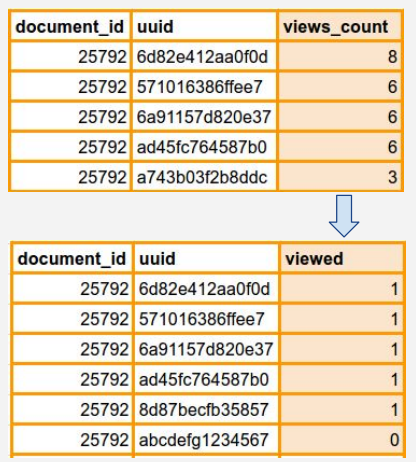

In [142]:
# hide_code
Image('references/images/binarization_ex.png', width=500, height=100)

In [208]:
popsong_df = pd.read_csv('data/raw/song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


In [209]:
from sklearn.preprocessing import Binarizer


pd_watched = Binarizer().transform([popsong_df['listen_count']])[0]

popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


#### Other Form

In [205]:
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


Assim, obtemos um recurso binarizado indicando se a música foi ouvida ou não por cada usuário, o que pode ser usado posteriormente em um modelo relevante.

#### NOTE
Remove outliers.


### `OneHotEncoding()`

- Codificada por label, e depois dividi a coluna em várias colunas.
- Pode ser usado a função `get_dummies()` equivale a one-hot encoding
- Garante que um modelo não estabelece um peso diferente para cada label.
- A feature se torna linear

#### NOTE
- Funciona com missing values.
- Corrigi 1ª forma normal

### Algoritms
- Bom para métodos lineares, kNN ou redes neurais.
- Se muitas variáveis dummy pode tornar-se difícil para os métodos de árvore que eles usam os primeiros de forma eficiente. Mais precisamente, os métodos de árvores irão desacelerar, nem sempre melhorando seus resultados.

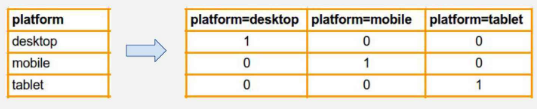

In [152]:
# hide_code
Image('references/images/one_hot.png', width=800, height=100)

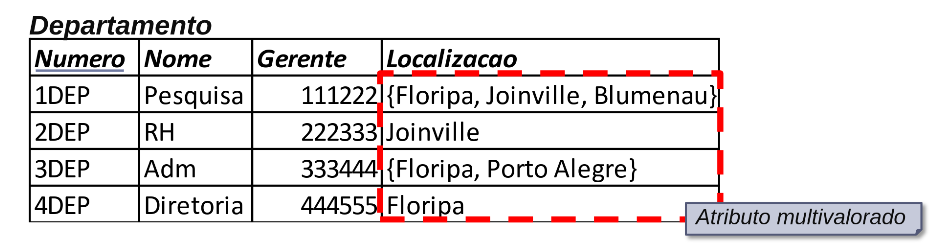

In [170]:
# hide_code
Image('references/images/multivalorado.png', width=800, height=100)

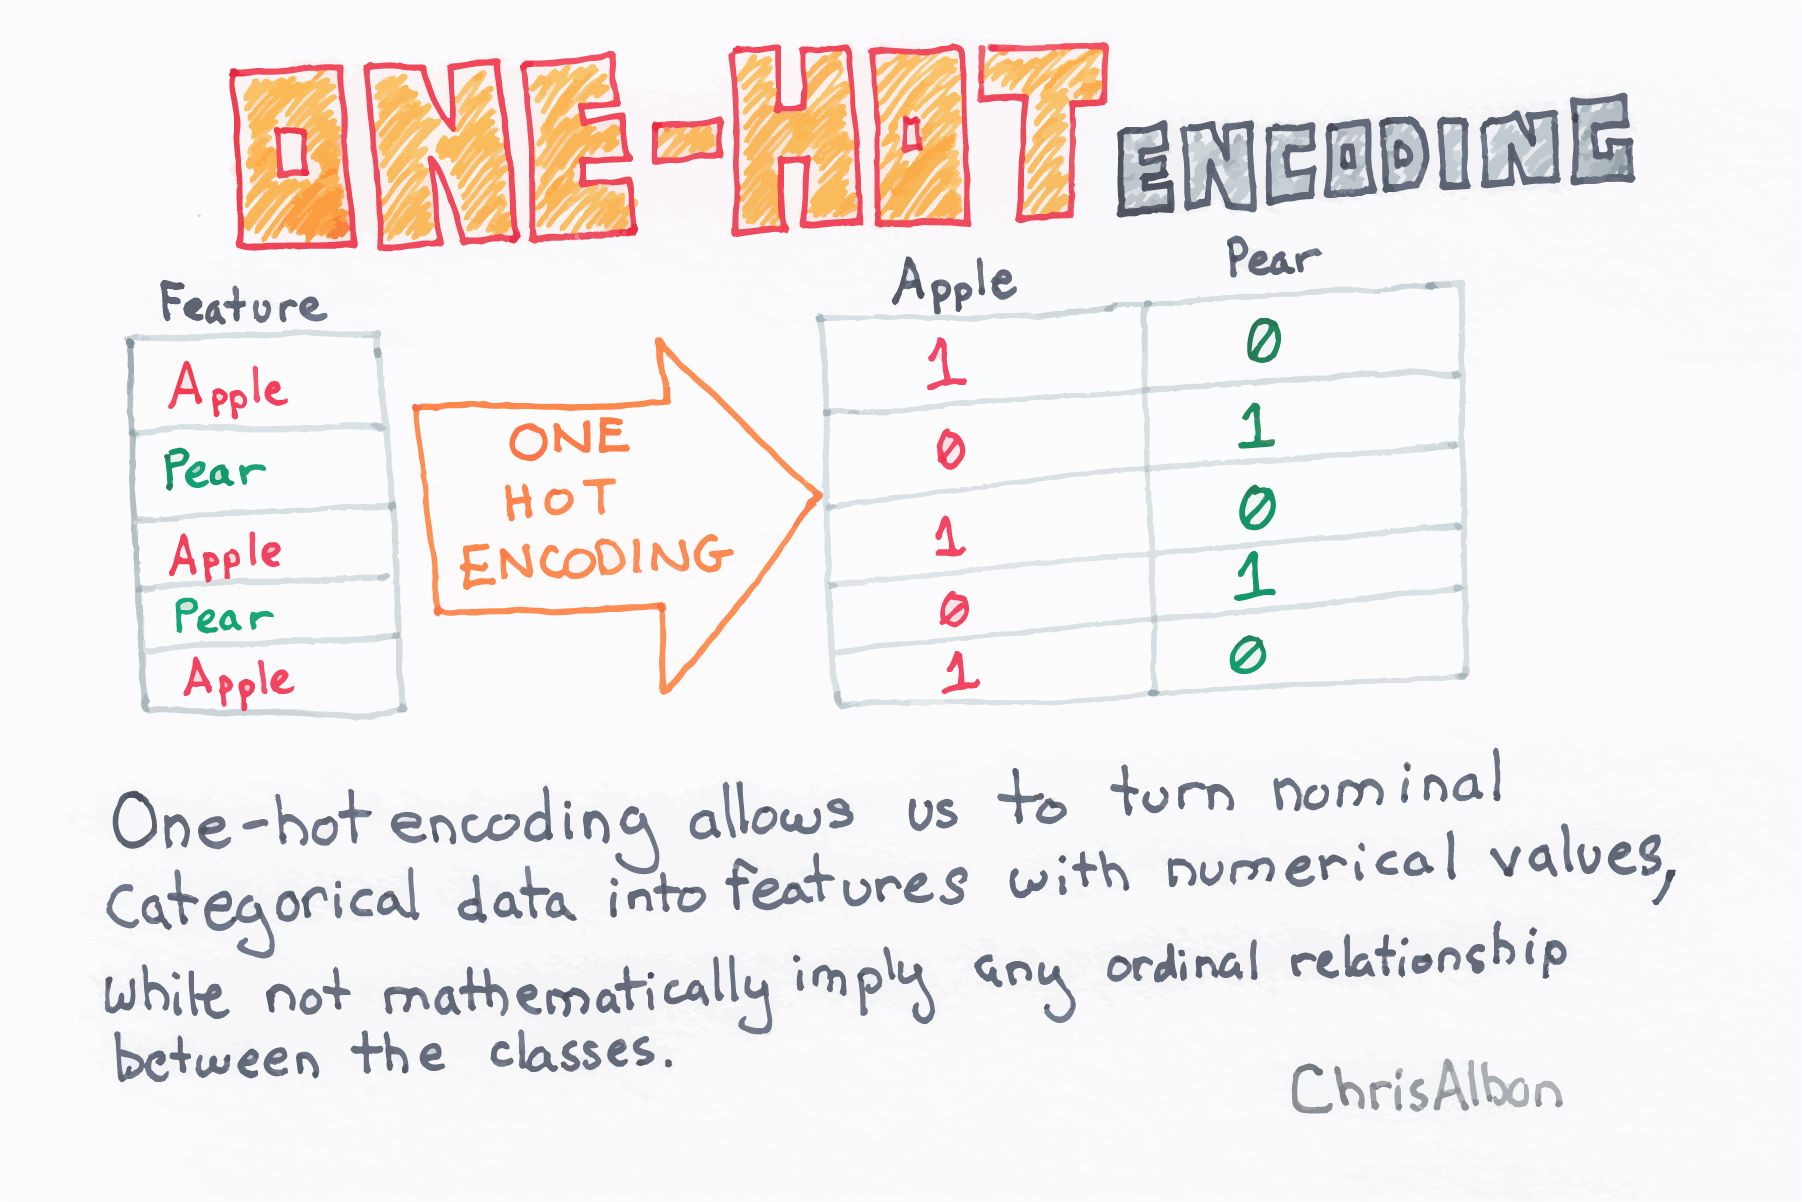

In [168]:
# hide_code
Image('references/images/one_hot_enc.png', width=660, height=400)

- Example

In [164]:
df_enroll.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65.0,True,True
1,448,canceled,2014-11-05,2014-11-10,5.0,True,True
2,448,canceled,2015-01-27,2015-01-27,0.0,True,True
3,448,canceled,2014-11-10,2014-11-10,0.0,True,True
4,448,current,2015-03-10,NaN,nan,True,False


In [165]:
# get_dummies()

df_enroll = pd.get_dummies(data=df_enroll,
                           columns=['is_canceled'],
                           dummy_na=True,
                           prefix_sep='_')

In [166]:
df_enroll.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled_False,is_canceled_True,is_canceled_nan
0,448,canceled,2014-11-10,2015-01-14,65.0,True,0,1,0
1,448,canceled,2014-11-05,2014-11-10,5.0,True,0,1,0
2,448,canceled,2015-01-27,2015-01-27,0.0,True,0,1,0
3,448,canceled,2014-11-10,2014-11-10,0.0,True,0,1,0
4,448,current,2015-03-10,NaN,nan,True,1,0,0


## One-Hot Encondig Advanced: Feature Hashing
    
É uma técnica usada quando se tem muitas features categoricas numa mesma coluna (alta cardinalidade), como por exemplo uma coluna com o nome de todos os países. 
    

**Problems**: muitas colisoes resultado perda de dados

## PESQUSAR MAIS...

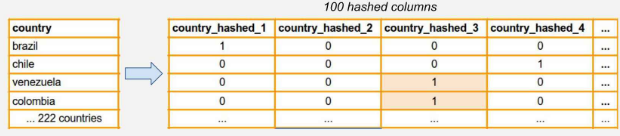

In [169]:
# hide_code
Image('references/images/feature_hashing.png', width=800, height=100)

---

## Log Transform `np.log()`

_Compresses the range of large numbers and expand the range of small numbers._

- Features com distribuição muito distorcida
- Diminui  importância dos outliers
- Distribuição mais perto da normal
- Abaixa o Skew (mean e median mais próximos)

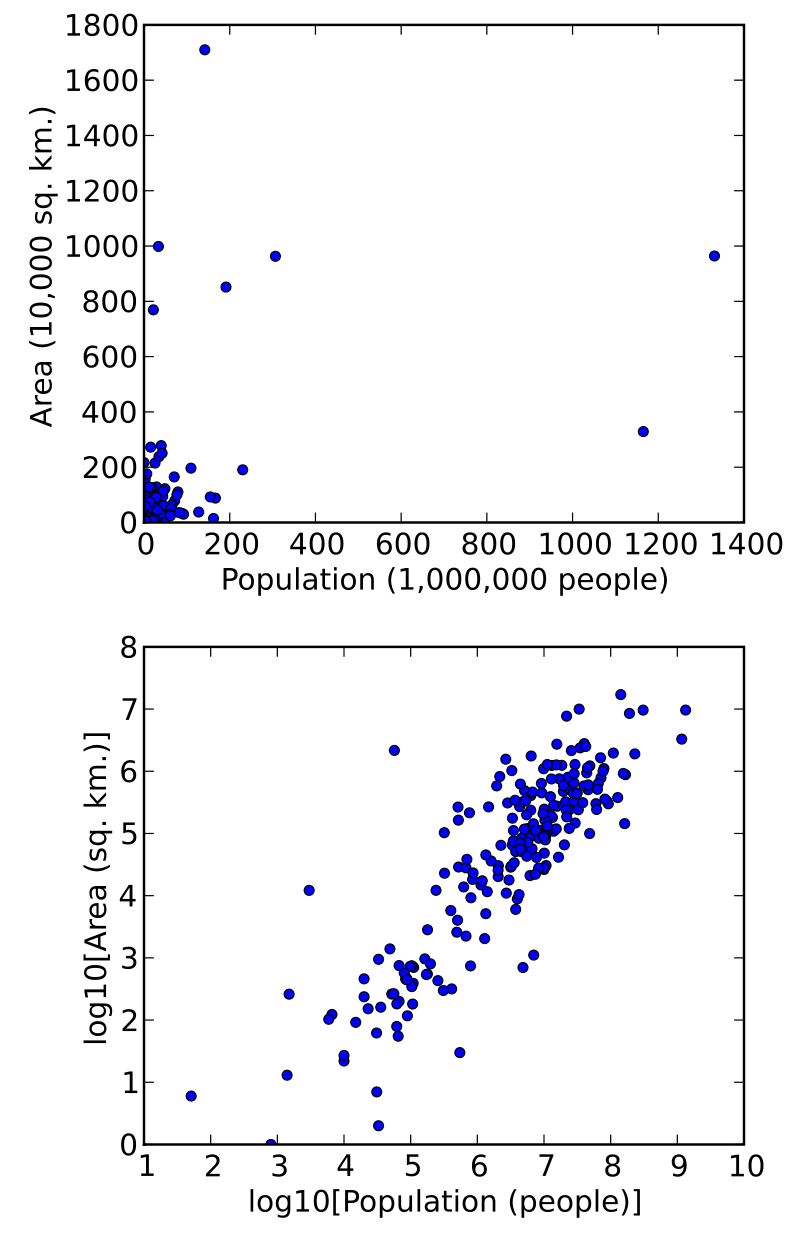

In [174]:
Image('references/images/log_transform.png', width=300, height=100)

#### Algoritms
- Não ajuda modelos basaeados em tree
- Muito útil para neural networks, modelos lineares, KNN

**Example**

- No dataset abaixo, o usuário _a_ foi contado 2x mais do que o usuário _b_
- Contudo, não importa se o usuário acessa 500 ou 10000 vezes, ele já é um outliers
- Ao aplicar o log, é dado um novo peso aos dados
- Expandir as diferenças entre valores pequenos e contrair a diferença entre valores grandes

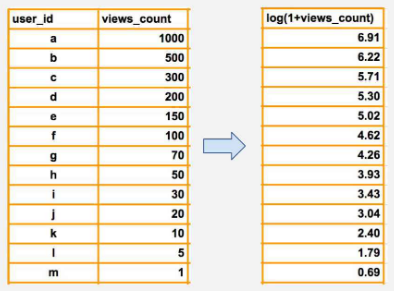

In [172]:
Image('references/images/log_transforms.png',  width=600, height=100)

- features with highly skewed, necessary scaling (log transform)

In [180]:
# Log feature
df_callcenter['duracao'] = [np.log(x) for x in df_callcenter['duracao']]

#### Log de 0
- Feature tem valor 0
- Log de 0 é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de 0 para aplicar o logaritmo adequadamente.

In [182]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

In [183]:
def plot_distribuition(df: 'dataframe', column: str):
    plt.figure()
    df[column].plot.hist(alpha=0.5, color='blue')
    plt.title(f"Distribuição da Coluna {column}")
    plt.show()

    sns.boxplot(x=df[column],
                width=0.5,
                showfliers=True)

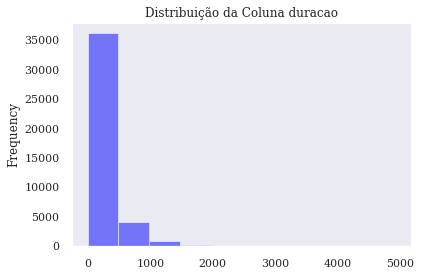

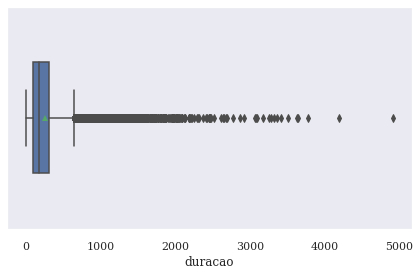

In [193]:
plot_distribuition(df_callcenter_cleasing, 'duracao')

In [194]:
apply_log(df = df_callcenter_cleasing,
          fix= 1,
          type_col = int,
          column = 'duracao')

'Skew before = 3.263141255262832 -> Skew after = -0.36925991299500305'

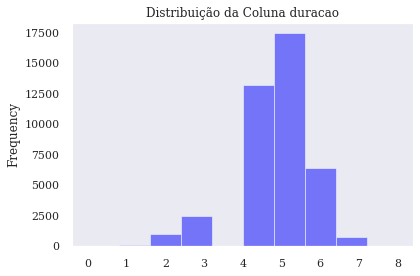

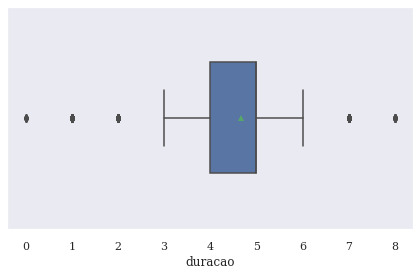

In [196]:
plot_distribuition(df_callcenter_cleasing, 'duracao')

---

## Bin-counting

É substituir um valor categórico por uma estatítica daquela feature.

Por exemplo, o nome de cada vitrine passa a ser o a taxa de conversão dele.

A grande vantagem é que uma decision tree vai aprender que a taxa de conversão tem grande peso


### Algoritms
É um grande auxílio para decisions tree e linear models.

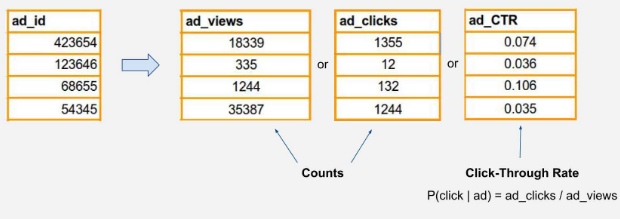

In [134]:
# hide_code
Image('references/images/hashing.png', width=800, height=100)

#### Frequency Enconding

- Podemos mapear essas features para valores suas frequências.
- É se a frequência do valor estiver correlacionada com a feture target. 

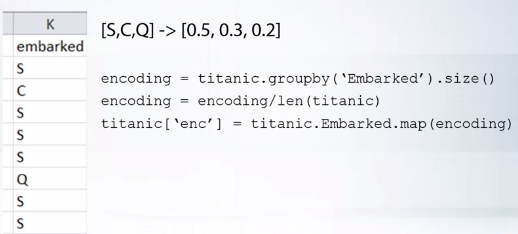

In [576]:
# hide_code
Image('references/images/frequency.png', width=800, height=100)

Podemos alterar esses valores de acordo: c para 0,3, s para 0. 5 e q para 0,2.
<br/>
Isso preservará algumas informações sobre distribuição de valores

---

## Feature Scaling (normalization)
- `média = 0`.

Na vida real, é um absurdo esperar que as colunas de **idade** e **renda** tenham o mesmo intervalo. Mas do ponto de vista de machine learing como essas duas colunas podem ser comparadas?

A técnica de scale (normalização) resolve este problema.

- **O ajuste da escala não modifica a distribuição, apenas desloca.**
-  A normalização garante que cada atributo será tratado com o mesmo peso 
- É uma operação em feature (coluna).


#### NOTE
- Antes de aplicar scale, é preciso tratar os outliers.

#### Example
Uso de 2 features com escalas muito diferentes: 
 - height
 - weight

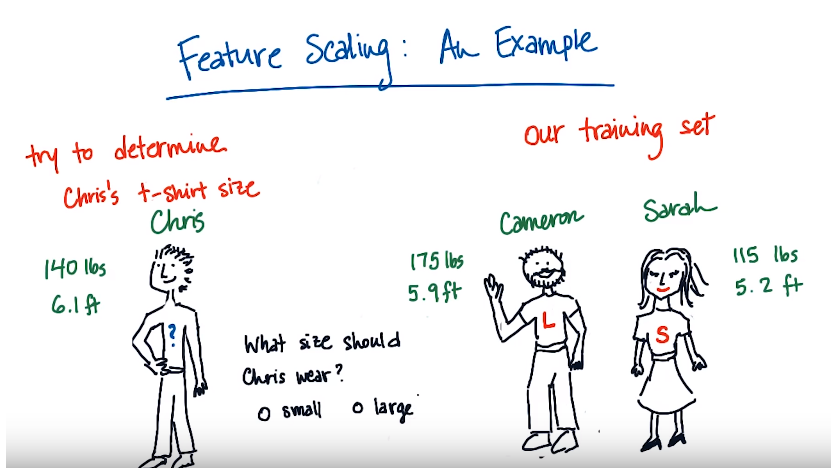

In [200]:
# hide_code
Image('references/images/fature_scaling.png', width=800, height=100)

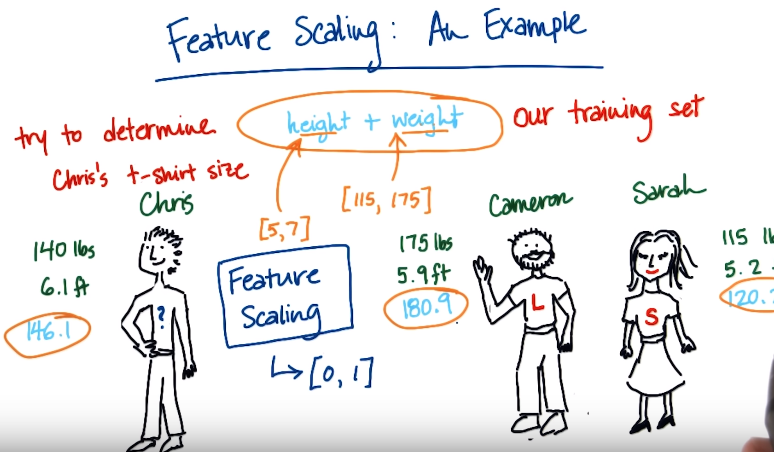

In [202]:
# hide_code
Image('references/images/feature_scaling_2.png', width=800, height=100)

#### Algoritms
In general, algorithms that **exploit distances** between data samples, such as k-NN, SVM and neural networks, are sensitive to feature transformations.

- A padronização dos dados se torna fundamental para estes modelos.

- Decisions Trees não são afetadas !<br/>
 Não são afetadas pois no gráfico um decision tree é uma série de linhas verticais e horizontais.
 Ao fazer o scale, cada box (decisão) será divido em um lugar diferente em relação ao eixo X mas não haverá um compensasão entre as decisões.

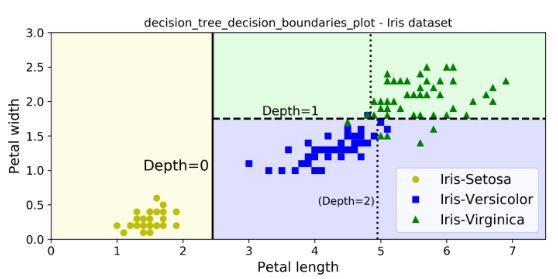

In [210]:
# hide_code
Image('references/images/decision-tree-boundaries.jpeg', width=800, height=100)

- Linear Regression and Logistic Regression
 - Dependendo do caso, há necessidade de scale
    
    

- `minMaxScaler()`
  - intervalo padrão: 0 a 1.


**References**
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3abe
- http://vita.had.co.nz/papers/tidy-data.pdf
- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

### `MinMaxScaler()`

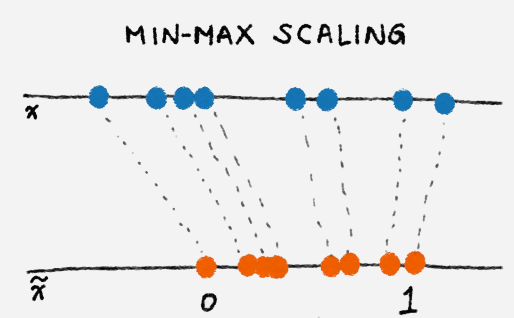

In [230]:
# hide_code
Image('references/images/minmax.png', width=500, height=100)

In [226]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'qtd_contatos_campanha']
df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,334,1
41184,383,1
41185,189,2
41186,442,1
41187,239,3


In [227]:
from sklearn.preprocessing import MinMaxScaler


# trainnig data
scaler_transformer = MinMaxScaler().fit(df_callcenter[list_col_scale])

In [228]:
# transform columns
df_callcenter[list_col_scale] = scaler_transformer.transform(df_callcenter[list_col_scale])

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,0.0679138,0.0
41184,0.0778772,0.0
41185,0.0384303,0.0181818
41186,0.0898739,0.0
41187,0.048597,0.0363636


---

### Standardization (padronização)
- É a aplicação do log mais suave
- Significa alterar os valores para que o `desvio padrão = 1`
- Altera a distribuição, deixando mais próximo de uma distribuição normal.


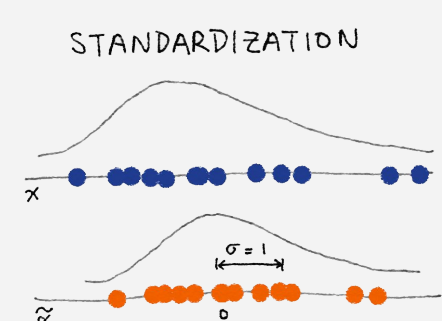

In [296]:
# hide_code
Image('references/images/standarization.png', width=500, height=100)

In [356]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'qtd_contatos_campanha']
df_callcenter = df_callcenter[list_col_scale]

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,334,1
41184,383,1
41185,189,2
41186,442,1
41187,239,3


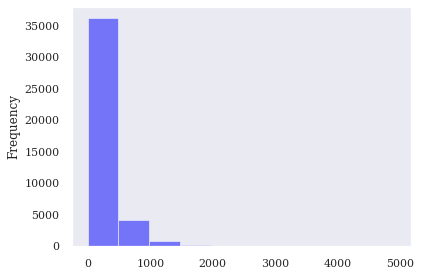

In [357]:
plt.figure()
df_callcenter['duracao'].plot.hist(alpha=0.5, color='blue')
plt.show()

In [358]:
from sklearn.preprocessing import StandardScaler


# trainnig data
scaler_transformer = StandardScaler().fit(df_callcenter[list_col_scale])

In [359]:
# transform columns
df_callcenter[list_col_scale] = scaler_transformer.transform(df_callcenter[list_col_scale])

df_callcenter[list_col_scale].tail()

,duracao,qtd_contatos_campanha
41183,0.292025,-0.565922
41184,0.481012,-0.565922
41185,-0.267225,-0.204909
41186,0.708569,-0.565922
41187,-0.0743802,0.156105


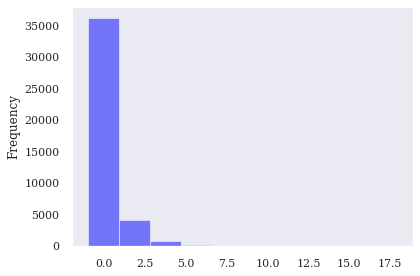

In [360]:
df_callcenter['duracao'].plot.hist(alpha=0.5, color='blue')
plt.show()

---

## Interaction Features
Simple linear models use a linear combination of the individual input features, x1, x2, ... xn to predict the outcome y.
- sum, diff, multiplication or division
- create feature combinations (nonlinear features).

- Usar o conhecimento de domínio para pensar sobre quais interações seriam prováveis

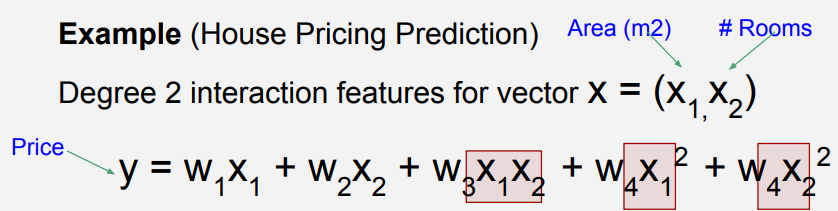

In [362]:
# hide_code
Image('references/images/interaction_features.png', width=700, height=100)

### Algoritms
- Qualquer algortimo não linear

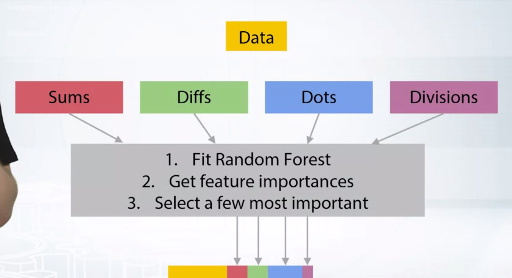

In [363]:
# hide_code
Image('references/images/interacion_feature_random.png', width=700, height=100)

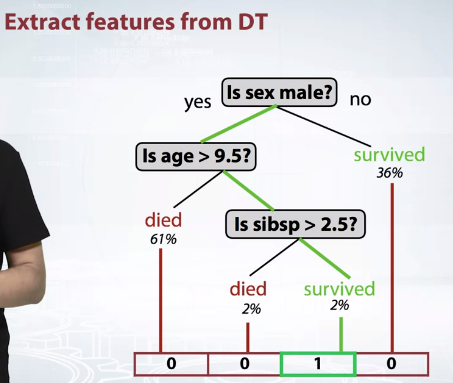

In [364]:
# hide_code
Image('references/images/extract_features.png', width=700, height=100)

In [ ]:
# extract feature from DT
tree_model.apply()

#### Example
Preços de produtos como uma feature

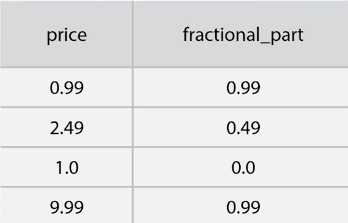

In [571]:
# hide_code
Image('references/images/feature_generation.png', width=400, height=100)

Podemos adicionar uma nova feature indicando parte fracionária desses preços.
<br/>
Por exemplo, se algum produto custa 2,49, a parte fracionária de seu preço é 0,49. Esse recurso pode ajudar o modelo a utilizar as diferenças na percepção das pessoas sobre esses preços. 
<br/>
Além disso, podemos encontrar padrões semelhantes em tarefas que exigem distinguir entre um humano e um robô. 

### `PolynomialFeatures()`

Generate a new feature matrix consisting of all polynomial combinations of the features

- Param: the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [564]:
df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

list_col_scale = ['duracao', 'idade']
df_callcenter = df_callcenter[list_col_scale]

df_callcenter.head()

,duracao,idade
0,261,56
1,149,57
2,226,37
3,151,40
4,307,56


In [2]:
# PolynomialFeatures()
from sklearn.preprocessing import PolynomialFeatures


# create object
poly = PolynomialFeatures(interaction_only=True,
                          include_bias=True,
                          degree=2)

# trainning and transform
feature_interaction = poly.fit_transform(df_callcenter)

NameError: name 'df_callcenter' is not defined

In [3]:
print('Type feature_interaction = ', type(feature_interaction), end='\n\n')
display(poly.get_feature_names(df_callcenter.columns))

NameError: name 'feature_interaction' is not defined

In [574]:
# create dataframe
df_interaction = pd.DataFrame(data=feature_interaction,  # numpy array
                              columns=poly.get_feature_names(df_callcenter.columns))

In [573]:
df_interaction.head()

,1,duracao,idade,duracao idade
0,1.0,261.0,56.0,14616.0
1,1.0,149.0,57.0,8493.0
2,1.0,226.0,37.0,8362.0
3,1.0,151.0,40.0,6040.0
4,1.0,307.0,56.0,17192.0


### Interaction Categorical Feature
Isso geralmente é útil para modelos não baseados em árvore, ou seja, modelo linear, kNN.

- Examples

Por exemplo, vamos supor que a feature target depende da feature `pclass` e `sex`. Se isso for verdade, o modelo linear pode ajustar suas previsões para todas as combinações possíveis dessas duas features.

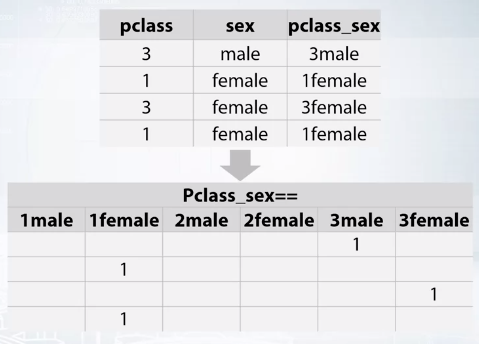

In [578]:
# hide_code
Image('references/images/cat_features.png', width=600, height=100)

---

## Binning
Split numerical values into bins and encode with a bin ID
- Discretização

In [371]:
fcc_survey_df = pd.read_csv('data/raw/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


Text(0, 0.5, 'Frequency')

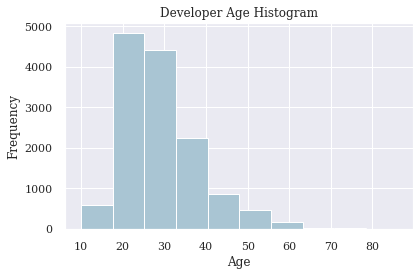

In [372]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

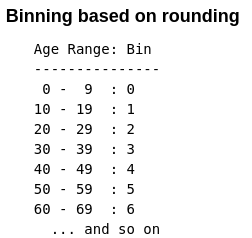

In [373]:
# hide_code
Image('references/images/binning_table.png', width=200, height=100)

In [376]:
fcc_survey_df['Age_bin'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin']].iloc[1071:1076]

,ID.x,Age,Age_bin
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


#### Binnig a Date-Time

Se você suspeitar que há relacionamentos entre tempos e outros atributos, você pode decompor uma data-hora em partes constituintes que podem permitir que os modelos descubram e explorem essas relações.

Por exemplo, você pode suspeitar que existe uma relação entre a hora do dia e outros atributos.

Você pode criar um novo recurso numérico chamado Hour_of_Day para a hora que pode ajudar um modelo de regressão.

Você poderia criar um novo recurso ordinal chamado Part_Of_Day com 4 valores Manhã , Meio-dia , Tarde , Noite com qualquer limite de hora que você achar relevante. Isso pode ser útil para uma árvore de decisão.

## References:
- https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
- http://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf
- https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
- https://www.coursera.org/learn/competitive-data-science/home/welcome
- https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9